# Image Classification of Documents

## 1. Setup



### 1.1 Getting dataset into colab
After running split_data.ipynb (need to change it to a .py file), compress the data folder to a .zip file which would reduce the size by more than 10 and call it data.zip, then upload the compressed file to google drive. After importing the file, use !unzip to uncompress


Use one of the colab code snippet to get the list of all .zip files and use another to import the file. 


In [5]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.zip'"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title data.zip, id 1pMEgJWXyKopKo5OQTSpG1pTK8XFj7Cg9
title firebase-arduino-master.zip, id 0B4tww7CJlZPyUTd1enFxNklKOE0
title Re Zero Kara Hajimeru v09.zip, id 0B-1T9fhvtxApbjRIM2NZcGdjVFE
title Re Zero Kara Hajimeru v08.zip, id 0B-1T9fhvtxApRWZhaXpkSEZ4S1E


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1pMEgJWXyKopKo5OQTSpG1pTK8XFj7Cg9'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data.zip')


In [7]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/test/
   creating: data/test/Advertisement/
  inflating: data/test/Advertisement/04102204.tif  
  inflating: data/test/Advertisement/1002761668.tif  
  inflating: data/test/Advertisement/1002762773.tif  
  inflating: data/test/Advertisement/2025016432.tif  
  inflating: data/test/Advertisement/2041511979.tif  
  inflating: data/test/Advertisement/2049398699.tif  
  inflating: data/test/Advertisement/2058503524.tif  
  inflating: data/test/Advertisement/2061003642.tif  
  inflating: data/test/Advertisement/2061199558.tif  
  inflating: data/test/Advertisement/2065199983_9984.tif  
  inflating: data/test/Advertisement/2069506477.tif  
  inflating: data/test/Advertisement/2070717320_7321.tif  
  inflating: data/test/Advertisement/2070718633.tif  
  inflating: data/test/Advertisement/2084396137_6138.tif  
  inflating: data/test/Advertisement/2084426012_6013.tif  
  inflating: data/test/Advertisement/2084427165_7166.tif  
  inflating: 

### Now restart the kernel by choosing Kernel > Restart.

In [0]:
# if you wanna test the code
# import os
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import numpy as np

# os.chdir("data/test/Advertisement")

# img=mpimg.imread('2067311301_2067311302.tif')
# imgplot = plt.imshow(img)
# os.chdir("../../../")

In [24]:
!ls

adc.json  data	data.zip  sample_data


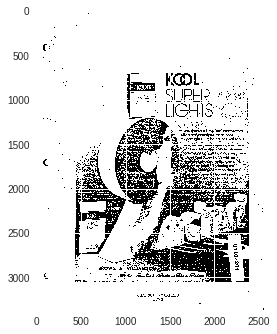

### 1.2 Import packages and libraries
Import the packages and libraries that you'll use:

In [0]:
import os, random
import numpy as np
import pandas as pd
import PIL
import keras
import itertools
from PIL import Image
import ibm_boto3
from botocore.client import Config


from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from skimage import feature, data, io, measure
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


Using TensorFlow backend.
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 2. Configuration
Add configurable items of the notebook below

### 2.1 Add your service credentials for Object Storage
You must create Object Storage service on IBM Cloud. To access data in a file in Object Storage, you need the Object Storage authentication credentials. Insert the Object Storage Streaming Body credentials and ensure the variable is referred as  streaming_body_1 in the following cell after removing the current contents in the cell.

In [0]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_8e7d0cae69cd45ec8430f0389e234d95 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='camH8xhqAskFpeCetoDdeIgsrZJbTCdvhIClFCf8ZScD',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_8e7d0cae69cd45ec8430f0389e234d95.get_object(Bucket='imagerecognitionpattern-donotdelete-pr-7whfpase0vr47w', Key='Data.zip')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 



### 2.2 Global Variables 
Enter the batch size for training, testing and validation dataset

In [0]:
batch_size_train = 20
batch_size_val = 10
batch_size_test = 25
num_classes= 5
intereseted_folder='Documents'
STANDARD_SIZE=(224,224)

# 3. Storage

## 3.1 Extract the Dataset 

Input the zip file from object storage and extract the data onto the /home/dsxuser/work folder

In [0]:
from io import BytesIO
import zipfile

zip_ref = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
paths = zip_ref.namelist()
classes_required=[]
for path in paths:
    zip_ref.extract(path)
    temp=path.split('/')
    if len(temp) > 3:
        if temp[2] not in classes_required:
            classes_required.append(temp[2])
print(classes_required)
zip_ref.close()

['Cheque', 'Passport', 'Documents', 'Pancard', 'Driving_License']


# 4. Classification

## 4.1 Create the Datset

In [0]:
'''Converting Data Format according to the backend used by Keras
'''
datagen=keras.preprocessing.image.ImageDataGenerator(data_format=K.image_data_format())

In [0]:
'''Input the Training Data
'''
train_path = '/home/dsxuser/work/Data/Train_Data/'
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=classes_required, batch_size=batch_size_train)
type(train_batches)

Found 20 images belonging to 5 classes.


keras.preprocessing.image.DirectoryIterator

In [0]:
'''Input the Validation Data
'''

val_path = '/home/dsxuser/work/Data/Val_Data/'
val_batches = ImageDataGenerator().flow_from_directory(val_path, target_size=(224,224), classes=classes_required, batch_size=batch_size_val)


Found 5 images belonging to 5 classes.


In [0]:
'''Input the Test Data
'''
test_path = '/home/dsxuser/work/Data/Test_Data/'
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=classes_required, batch_size=batch_size_test)


Found 5 images belonging to 5 classes.


In [0]:
test_imgs, test_labels = next(test_batches)
test_labels

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.]], dtype=float32)

In [0]:
y_test= [ np.where(r==1)[0][0] for r in test_labels ]
y_test

[0, 4, 3, 1, 2]

## 4.2 Build the Model

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()

553467904/553467096 [==============================] - 36s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

In [0]:
type(vgg16_model) #This is a Keras Functional API need to convert to sequential
model = Sequential() #Iterate over the functional layers and add it as a stack
for layer in vgg16_model.layers:
    model.add(layer)

In [0]:
model.layers.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in model.layers: #Since the model is already trained with certain weights, we dont want to change it. Let it be the same
    layer.trainable = False

In [0]:
model.add(Dense(5, activation='sigmoid')) # Add the last layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# Complie the model
model.compile(Adam(lr=.00015), loss='categorical_crossentropy', metrics=['accuracy'])

## 4.3 Train the Model

The model will take about 30-45 minutes to train. 

In [0]:
model.fit_generator(train_batches, steps_per_epoch=20, 
                    validation_data=val_batches, validation_steps=20, epochs=5, verbose=1)

Epoch 1/5
20/20 [==============================] - 616s 31s/step - loss: 1.5998 - acc: 0.4175 - val_loss: 1.5928 - val_acc: 0.6000
Epoch 2/5
20/20 [==============================] - 613s 31s/step - loss: 1.5843 - acc: 0.8600 - val_loss: 1.5769 - val_acc: 1.0000
Epoch 3/5
20/20 [==============================] - 615s 31s/step - loss: 1.5728 - acc: 1.0000 - val_loss: 1.5686 - val_acc: 1.0000
Epoch 4/5
20/20 [==============================] - 617s 31s/step - loss: 1.5660 - acc: 1.0000 - val_loss: 1.5639 - val_acc: 1.0000
Epoch 5/5
20/20 [==============================] - 615s 31s/step - loss: 1.5618 - acc: 1.0000 - val_loss: 1.5599 - val_acc: 1.0000


## 4.4 Test the Model with External Test Images

In [0]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_2 = client_8e7d0cae69cd45ec8430f0389e234d95.get_object(Bucket='imagerecognitionpattern-donotdelete-pr-7whfpase0vr47w', Key='test_doc-external.zip')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_2, "__iter__"): streaming_body_2.__iter__ = types.MethodType( __iter__, streaming_body_2 ) 



In [0]:
#model.save_weights('my_model_weights.h5')
#model.load_weights('my_model_weights.h5')

In [0]:
from io import BytesIO
import zipfile

zip_ref = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
paths = zip_ref.namelist()
del paths[0]
print(paths)
for path in paths:
    print(zip_ref.extract(path))
zip_ref.close()

['test_doc-external/Form1 copy 2.jpg', 'test_doc-external/pan copy 2.jpg', 'test_doc-external/cheque copy 2.jpg', 'test_doc-external/driving_license_2 copy 2.jpg', 'test_doc-external/passport copy 2.jpg']
/home/dsxuser/work/test_doc-external/Form1 copy 2.jpg
/home/dsxuser/work/test_doc-external/pan copy 2.jpg
/home/dsxuser/work/test_doc-external/cheque copy 2.jpg
/home/dsxuser/work/test_doc-external/driving_license_2 copy 2.jpg
/home/dsxuser/work/test_doc-external/passport copy 2.jpg


In [0]:
X_test=[]
def convert_to_image(X):
    '''Function to convert all Input Images to the STANDARD_SIZE and create Training Dataset
    '''
    for f in paths:
        #fobj=get_file(f)
        #print(type(fobj))predictions= model.predict(X_test)
        if os.path.isdir(f):
            continue
        img= PIL.Image.open(f)
        img = img.resize(STANDARD_SIZE)
        img=np.array(img)
        X.append(img)
        #print(X_train)
    #print(len(X_train))
    return X
X_test=np.array(convert_to_image(X_test))
datagen.fit(X_test)

In [0]:
predictions= model.predict(X_test)
predictions

array([[ 0.47580448,  0.47760704,  0.51829034,  0.50596583,  0.47304007],
       [ 0.47949249,  0.4817391 ,  0.47868609,  0.51169461,  0.49393257],
       [ 0.51717132,  0.4783558 ,  0.47287402,  0.50082076,  0.48920417],
       [ 0.50053394,  0.47719797,  0.47839782,  0.49702418,  0.51833802],
       [ 0.4910911 ,  0.52186197,  0.5108099 ,  0.48280653,  0.47803456]], dtype=float32)

In [0]:
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(np.argmax(predictions[i]))
y_pred
j = 0
for i in y_pred:
    print(paths[y_pred[j]])
    j = j + 1

test_doc-external/cheque copy 2.jpg
test_doc-external/driving_license_2 copy 2.jpg
test_doc-external/Form1 copy 2.jpg
test_doc-external/passport copy 2.jpg
test_doc-external/pan copy 2.jpg


In [0]:
#print(classes_required)
index= classes_required.index('Documents')
for i in range(len(y_pred)):
    if y_pred[i] == index:
        print("Image classified as a form document: ", paths[i])

Image classified as a form document:  test_doc-external/Form1 copy 2.jpg


## 4.5 Accuracy Testing

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions

array([[ 0.51717132,  0.4783558 ,  0.47287402,  0.50082076,  0.48920417],
       [ 0.50053394,  0.47719797,  0.47839782,  0.49702418,  0.51833802],
       [ 0.47949249,  0.4817391 ,  0.47868609,  0.51169461,  0.49393257],
       [ 0.4910911 ,  0.52186197,  0.5108099 ,  0.48280653,  0.47803456],
       [ 0.47580448,  0.47760704,  0.51829034,  0.50596583,  0.47304007]], dtype=float32)

In [0]:
predictions
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(np.argmax(predictions[i]))
print(y_pred)
#plots(test_imgs, titles=y_pred)

ctr=0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        ctr=ctr+1
res = ctr/len(y_pred)*100
print(res)


[0, 4, 3, 1, 2]
100.0
